### 데이터 준비 및 환경 설정

In [1]:
import os
os.chdir("../../데이터")

In [2]:
import pandas as pd
sp_data_dict = dict()
for file_name in os.listdir("주가데이터"):
    sp_data = pd.read_csv("주가데이터/" + file_name, parse_dates = ['Date'])
    stock_name = file_name.replace('.csv', '')
    sp_data_dict[stock_name] = sp_data

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
sns.set()
%matplotlib inline
rcParams['font.family'] = 'Malgun Gothic'
rcParams['axes.unicode_minus'] = False 

In [1]:
import warnings
warnings.filterwarnings("ignore")

### 상승장악형

#### 패턴 탐지

In [4]:
# 현대차 예시
sample_data = sp_data_dict["현대차"]

In [5]:
import numpy as np
cond_1 = (sample_data['Open'] > sample_data['Close']).values[:-1]
cond_2 = (sample_data['Open'] < sample_data['Close']).values[1:]
cond_3 = (sample_data['Low'].values[:-1] > sample_data['Open'].values[1:])
cond_4 = (sample_data['High'].values[:-1] < sample_data['Close'].values[1:])

cond = cond_1 & cond_2 & cond_3 & cond_4
cond = np.insert(cond, 0, False)
sample_data["상승장악형"] = cond

In [6]:
# 전종목 적용
for stock_name in sp_data_dict.keys():
    sp_data = sp_data_dict[stock_name]
    cond_1 = (sp_data['Open'] > sp_data['Close']).values[:-1]
    cond_2 = (sp_data['Open'] < sp_data['Close']).values[1:]
    cond_3 = (sp_data['Low'].values[:-1] > sp_data['Open'].values[1:])
    cond_4 = (sp_data['High'].values[:-1] < sp_data['Close'].values[1:])

    cond = cond_1 & cond_2 & cond_3 & cond_4
    cond = np.insert(cond, 0, False)
    sp_data["상승장악형"] = cond

#### 기대 수익 계산

In [7]:
def calc_ror_after_patt(sp_data, patt_col, n):
    patt_idx_list = sp_data.loc[sp_data[patt_col]].index
    no_patt_idx_list = sp_data.index.difference(patt_idx_list)
    max_idx = max(sp_data.index)
    
    patt_bidx_list = patt_idx_list[patt_idx_list + n < max_idx] + 1
    patt_sidx_list = patt_bidx_list + n
    no_patt_bidx_list = no_patt_idx_list[no_patt_idx_list + n < max_idx] + 1
    no_patt_sidx_list = no_patt_bidx_list + n
    # 패턴 발생 후 수익률 계산
    patt_bp_list = sp_data.loc[patt_bidx_list, 'Close'].values
    patt_sp_list = sp_data.loc[patt_sidx_list, 'Close'].values
    patt_ror_list = (patt_sp_list - patt_bp_list) / patt_bp_list * 100
    # 패턴 미 발생 후 수익률 계산
    no_patt_bp_list = sp_data.loc[no_patt_bidx_list, 'Close'].values
    no_patt_sp_list = sp_data.loc[no_patt_sidx_list, 'Close'].values
    no_patt_ror_list = (no_patt_sp_list - no_patt_bp_list) / no_patt_bp_list * 100
    
    return patt_ror_list.tolist(), no_patt_ror_list.tolist()

In [8]:
result_dict = dict()
for n in [5, 20, 60, 120]:
    total_patt_ror_list = []
    total_no_patt_ror_list = []
    for stock_name in sp_data_dict.keys():
        sp_data = sp_data_dict[stock_name]
        patt_ror_list, no_patt_ror_list = calc_ror_after_patt(sp_data, "상승장악형", n)
        total_patt_ror_list += patt_ror_list
        total_no_patt_ror_list += no_patt_ror_list
    result_dict[n] = total_patt_ror_list, total_no_patt_ror_list

#### 5영업일 보유 시 수익 비교

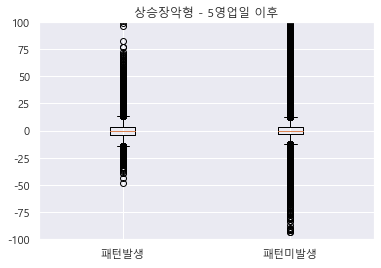

In [9]:
plt.title("상승장악형 - 5영업일 이후")
plt.boxplot(result_dict[5])
plt.xticks([1, 2], ["패턴발생", "패턴미발생"])
plt.ylim(-100, 100)
plt.show()

In [10]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[5]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,16418.00,4763307.00
mean,0.09,0.35
std,8.85,7.97
min,-47.84,-93.39
25%,-3.82,-3.20
50%,-0.44,0.00
75%,3.04,3.04
max,270.73,900.11


#### 20영업일 보유 시 수익 비교

In [11]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[20]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,16350.00,4730705.00
mean,0.81,1.41
std,17.75,16.62
min,-70.48,-93.39
25%,-7.77,-6.60
50%,-0.91,-0.22
75%,6.57,6.75
max,424.31,1226.67


#### 60영업일 보유 시 수익 비교

In [12]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[60]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,16102.00,4643833.00
mean,3.39,4.09
std,30.54,29.98
min,-80.65,-94.68
25%,-12.01,-11.08
50%,-0.99,-0.23
75%,12.23,12.64
max,1047.06,1531.84


#### 120영업일 보유 시 수익 비교

In [13]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[120]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,15778.00,4513477.00
mean,6.55,8.14
std,43.12,45.58
min,-83.01,-97.33
25%,-16.17,-14.79
50%,-1.24,-0.12
75%,18.07,18.98
max,1066.49,2033.13


### 하락장악형

#### 패턴 탐지

In [14]:
for stock_name in sp_data_dict.keys():
    sp_data = sp_data_dict[stock_name]
    cond_1 = (sp_data['Open'] < sp_data['Close']).values[:-1]
    cond_2 = (sp_data['Open'] > sp_data['Close']).values[1:]
    cond_3 = (sp_data['High'].values[:-1] < sp_data['Open'].values[1:])
    cond_4 = (sp_data['Low'].values[:-1] > sp_data['Close'].values[1:])

    cond = cond_1 & cond_2 & cond_3 & cond_4
    cond = np.insert(cond, 0, False)
    sp_data["하락장악형"] = cond

#### 기대 수익 계산

In [15]:
result_dict = dict()
for n in [5, 20, 60, 120]:
    total_patt_ror_list = []
    total_no_patt_ror_list = []
    for stock_name in sp_data_dict.keys():
        sp_data = sp_data_dict[stock_name]
        patt_ror_list, no_patt_ror_list = calc_ror_after_patt(sp_data, "하락장악형", n)
        total_patt_ror_list += patt_ror_list
        total_no_patt_ror_list += no_patt_ror_list
    result_dict[n] = total_patt_ror_list, total_no_patt_ror_list

#### 5영업일 보유 시 수익 비교

In [16]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[5]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,20143.00,4759582.00
mean,0.44,0.35
std,8.60,7.97
min,-62.50,-93.39
25%,-3.28,-3.20
50%,0.00,0.00
75%,3.39,3.04
max,151.49,900.11


#### 20영업일 보유 시 수익 비교

In [17]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[20]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,20056.00,4726999.00
mean,1.15,1.40
std,16.40,16.62
min,-74.70,-93.39
25%,-6.98,-6.60
50%,-0.38,-0.22
75%,6.84,6.75
max,445.00,1226.67


#### 60영업일 보유 시 수익 비교

In [18]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[60]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,19789.00,4640146.00
mean,3.67,4.09
std,29.54,29.99
min,-81.85,-94.68
25%,-11.44,-11.09
50%,-0.55,-0.24
75%,12.61,12.64
max,749.53,1531.84


#### 120영업일 보유 시 수익 비교

In [19]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[120]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,19405.00,4509850.00
mean,7.53,8.14
std,46.48,45.57
min,-93.29,-97.33
25%,-15.27,-14.79
50%,-0.74,-0.12
75%,18.49,18.97
max,1343.90,2033.13


### 적삼병

#### 패턴 탐지

In [20]:
for stock_name in sp_data_dict.keys():
    sp_data = sp_data_dict[stock_name]
    cur_price = sp_data["Close"].values[2:]
    pre_price = sp_data["Close"].values[1:-1]
    sec_pre_price = sp_data["Close"].values[:-2]
    
    cond_1 = (cur_price > pre_price) & (pre_price > sec_pre_price)
    cond_2 = (sp_data['Open'] < sp_data['Close']).values[:-2]
    cond_3 = (sp_data['Open'] < sp_data['Close']).values[1:-1]
    cond_4 = (sp_data['Open'] < sp_data['Close']).values[2:]

    cond = cond_1 & cond_2 & cond_3 & cond_4
    cond = np.insert(cond, [0, 0], False)
    sp_data["적삼병"] = cond

#### 기대 수익 계산

In [21]:
result_dict = dict()
for n in [5, 20, 60, 120]:
    total_patt_ror_list = []
    total_no_patt_ror_list = []
    for stock_name in sp_data_dict.keys():
        sp_data = sp_data_dict[stock_name]
        patt_ror_list, no_patt_ror_list = calc_ror_after_patt(sp_data, "적삼병", n)
        total_patt_ror_list += patt_ror_list
        total_no_patt_ror_list += no_patt_ror_list
    result_dict[n] = total_patt_ror_list, total_no_patt_ror_list

#### 5영업일 보유 시 수익 비교

In [22]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[5]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,275730.00,4503995.00
mean,0.41,0.35
std,8.58,7.93
min,-62.50,-93.39
25%,-3.50,-3.19
50%,-0.31,0.00
75%,3.20,3.03
max,197.54,900.11


#### 20영업일 보유 시 수익 비교

In [23]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[20]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,273910.00,4473145.00
mean,1.93,1.37
std,17.87,16.54
min,-86.93,-93.39
25%,-6.91,-6.58
50%,-0.26,-0.22
75%,7.58,6.70
max,1209.21,1226.67


#### 60영업일 보유 시 수익 비교

In [24]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[60]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,269944.00,4389991.00
mean,4.49,4.06
std,31.41,29.90
min,-86.85,-94.68
25%,-11.78,-11.05
50%,-0.35,-0.23
75%,13.69,12.57
max,1168.29,1531.84


#### 120영업일 보유 시 수익 비교

In [25]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[120]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,262033.00,4267222.00
mean,8.53,8.11
std,46.25,45.53
min,-97.33,-96.69
25%,-15.57,-14.75
50%,-0.41,-0.11
75%,20.31,18.89
max,1384.88,2033.13


### 흑삼병

#### 패턴 탐지

In [26]:
for stock_name in sp_data_dict.keys():
    sp_data = sp_data_dict[stock_name]
    cur_price = sp_data["Close"].values[2:]
    pre_price = sp_data["Close"].values[1:-1]
    sec_pre_price = sp_data["Close"].values[:-2]
    
    cond_1 = (cur_price < pre_price) & (pre_price < sec_pre_price)
    cond_2 = (sp_data['Open'] > sp_data['Close']).values[:-2]
    cond_3 = (sp_data['Open'] > sp_data['Close']).values[1:-1]
    cond_4 = (sp_data['Open'] > sp_data['Close']).values[2:]

    cond = cond_1 & cond_2 & cond_3 & cond_4
    cond = np.insert(cond, [0, 0], False)
    sp_data["흑삼병"] = cond

#### 기대 수익 계산

In [27]:
result_dict = dict()
for n in [5, 20, 60, 120]:
    total_patt_ror_list = []
    total_no_patt_ror_list = []
    for stock_name in sp_data_dict.keys():
        sp_data = sp_data_dict[stock_name]
        patt_ror_list, no_patt_ror_list = calc_ror_after_patt(sp_data, "흑삼병", n)
        total_patt_ror_list += patt_ror_list
        total_no_patt_ror_list += no_patt_ror_list
    result_dict[n] = total_patt_ror_list, total_no_patt_ror_list

#### 5영업일 보유 시 수익 비교

In [28]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[5]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,397405.00,4382320.00
mean,0.37,0.35
std,7.89,7.98
min,-69.01,-93.39
25%,-3.33,-3.19
50%,0.00,0.00
75%,3.44,3.00
max,220.00,900.11


#### 20영업일 보유 시 수익 비교

In [29]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[20]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,394878.00,4352177.00
mean,1.25,1.42
std,17.00,16.59
min,-84.97,-93.39
25%,-6.98,-6.57
50%,-0.34,-0.21
75%,7.14,6.72
max,900.00,1226.67


#### 60영업일 보유 시 수익 비교

In [30]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[60]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,385935.00,4274000.00
mean,4.07,4.09
std,30.69,29.92
min,-91.88,-94.68
25%,-11.60,-11.04
50%,-0.54,-0.21
75%,13.13,12.59
max,1487.16,1531.84


#### 120영업일 보유 시 수익 비교

In [31]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[120]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,375236.00,4154019.00
mean,8.28,8.13
std,46.23,45.51
min,-95.12,-97.33
25%,-15.30,-14.75
50%,-0.38,-0.10
75%,19.82,18.90
max,1755.20,2033.13


### 샛별형

#### 패턴 탐지

In [32]:
for stock_name in sp_data_dict.keys():
    sp_data = sp_data_dict[stock_name]
    cond_1 = sp_data["Close"].values[:-2] <= sp_data["Open"].values[:-2] * 1.1
    cond_2 = sp_data["Close"].values[1:-1] > sp_data["Open"].values[1:-1]
    cond_3 = sp_data["Close"].values[1:-1] < sp_data["Open"].values[1:-1] * 1.01
    cond_4 = sp_data["Close"].values[2:] >= sp_data["Open"].values[2:] * 1.1
    
    cond = cond_1 & cond_2 & cond_3 & cond_4
    cond = np.insert(cond, [0, 0], False)
    sp_data["샛별형"] = cond

#### 기대 수익 계산

In [33]:
result_dict = dict()
for n in [5, 20, 60, 120]:
    total_patt_ror_list = []
    total_no_patt_ror_list = []
    for stock_name in sp_data_dict.keys():
        sp_data = sp_data_dict[stock_name]
        patt_ror_list, no_patt_ror_list = calc_ror_after_patt(sp_data, "샛별형", n)
        total_patt_ror_list += patt_ror_list
        total_no_patt_ror_list += no_patt_ror_list
    result_dict[n] = total_patt_ror_list, total_no_patt_ror_list

#### 5영업일 보유 시 수익 비교

In [34]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[5]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,4711.00,4775014.00
mean,0.49,0.35
std,13.89,7.96
min,-61.58,-93.39
25%,-6.48,-3.20
50%,-0.97,0.00
75%,4.25,3.04
max,185.19,900.11


#### 20영업일 보유 시 수익 비교

In [35]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[20]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,4667.00,4742388.00
mean,2.01,1.40
std,25.79,16.61
min,-73.74,-93.39
25%,-11.42,-6.60
50%,-2.34,-0.22
75%,8.50,6.75
max,412.98,1226.67


#### 60영업일 보유 시 수익 비교

In [36]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[60]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,4614.00,4655321.00
mean,4.11,4.09
std,40.81,29.97
min,-90.64,-94.68
25%,-18.08,-11.08
50%,-2.99,-0.24
75%,13.97,12.63
max,685.07,1531.84


#### 120영업일 보유 시 수익 비교

In [37]:
total_patt_ror_list, total_no_patt_ror_list = result_dict[120]
result = pd.concat([pd.Series(total_patt_ror_list).describe(),
                   pd.Series(total_no_patt_ror_list).describe()],
                   axis = 1)
result.columns = ['패턴발생', '패턴미발생']
display(result.round(2))

,패턴발생,패턴미발생
count,4457.00,4524798.00
mean,9.60,8.14
std,64.88,45.55
min,-94.26,-97.33
25%,-22.13,-14.79
50%,-4.03,-0.12
75%,19.82,18.97
max,967.97,2033.13
